# EDA - Weather Data

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)

In [2]:
# load the Weather data 
W_Data = pd.read_csv(r"E:\ESCIHyd\Data\Weather_File01.csv", header=0)

# Copy file t back-up file

W_Data_bk = W_Data.copy()

# display first five records

W_Data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month_D,Year_D,Day_D,WeekNum_D,Year,Month,MonthName,Day,DayOfWeek,WeekNum,Season,IsRainy,IsWeekend,AvgTemp,AvgHumidity,HumidityVariation,TSI,AvgWindSpeed,AvgTemp_7d,Rain_7d_Sum
0,1/1/1980,9.5,29.2,0.1,5.6,12.4,NW,38.7,W,SSE,23.8,16.3,22,65,1022.2,1011.0,7,6,14.7,17.7,No,0.0,No,Jan,1980,Tue,1,1980,1,January,1,Tuesday,1,Winter,True,False,19.35,43.5,43,0.490956,20.05,0.000000,0.0
1,1/2/1980,13.8,35.1,0.8,3.7,10.6,S,56.9,S,N,17.4,8.0,22,26,1007.1,996.9,8,6,18.4,22.3,Yes,0.8,Yes,Jan,1980,Wed,1,1980,1,January,2,Wednesday,1,Winter,True,False,24.45,24.0,4,0.564417,12.70,0.000000,0.0
2,1/3/1980,8.0,18.2,0.1,6.4,7.5,NNW,49.0,SW,NNE,12.9,15.9,63,81,1015.1,1012.4,3,1,19.3,17.7,Yes,0.6,Yes,Jan,1980,Thu,1,1980,1,January,3,Thursday,1,Winter,True,False,13.10,72.0,18,0.610687,14.40,18.966667,1.0
3,1/4/1980,13.1,13.7,2.8,4.5,9.5,WNW,23.7,ESE,N,16.4,22.8,67,42,1018.4,1011.6,2,8,14.7,18.0,No,0.5,Yes,Jan,1980,Fri,1,1980,1,January,4,Friday,1,Winter,True,False,13.40,54.5,25,0.977612,19.60,17.575000,3.8
4,1/5/1980,12.5,24.0,3.8,3.3,8.1,N,49.6,W,W,7.3,8.2,23,33,1012.9,1008.3,4,8,8.2,18.0,Yes,5.0,Yes,Jan,1980,Sat,1,1980,1,January,5,Saturday,1,Winter,True,True,18.25,28.0,10,0.684932,7.75,17.710000,7.6


# Central Tendency

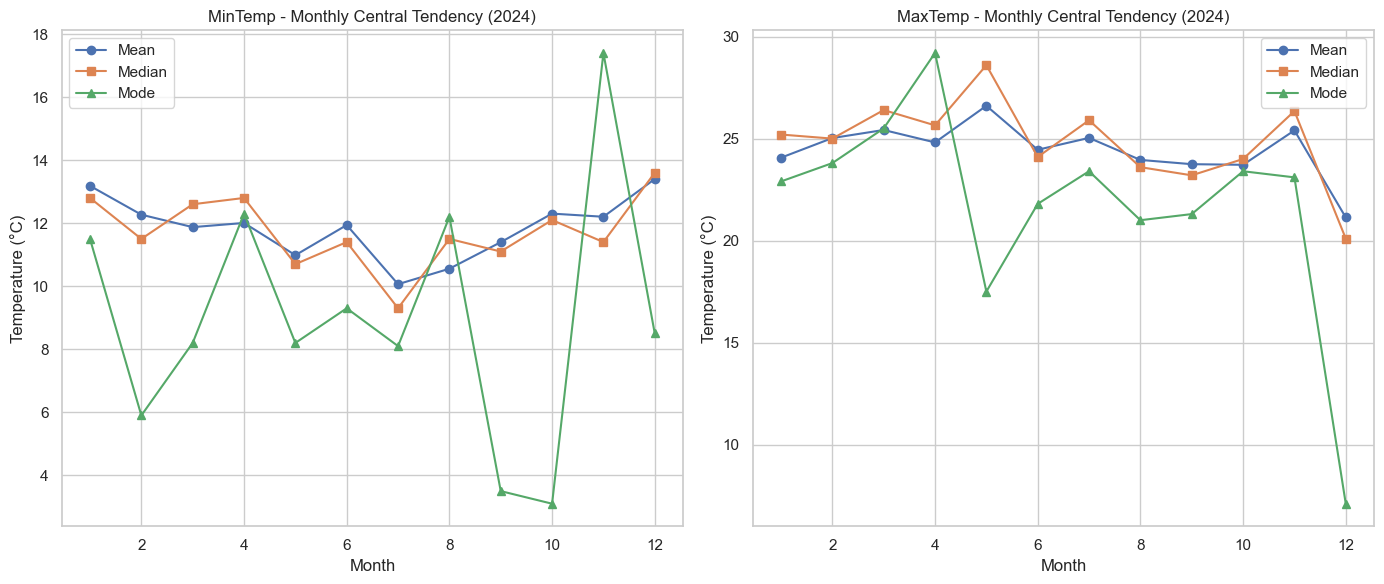

In [3]:
# Central Tendency - 
# Filter for year 2024
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2024 = W_Data[W_Data['Date'].dt.year == 2024].copy()

# Extract month
W_Data_2024['Month'] = W_Data_2024['Date'].dt.month

# Function to calculate mode
def calculate_mode(series):
    mode_val = stats.mode(series.dropna(), keepdims=True)
    return mode_val.mode[0] if len(mode_val.mode) > 0 else None

# Group by month and calculate central tendencies
summary = W_Data_2024.groupby('Month').agg({'MinTemp': ['mean', 'median', calculate_mode], 
                                            'MaxTemp': ['mean', 'median', calculate_mode]})

# Rename columns for clarity
summary.columns = ['MinTemp_Mean', 'MinTemp_Median', 'MinTemp_Mode', 'MaxTemp_Mean', 'MaxTemp_Median', 'MaxTemp_Mode']

# Reset index for plotting
summary = summary.reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Plot MinTemp
plt.subplot(1, 2, 1)
plt.plot(summary['Month'], summary['MinTemp_Mean'], marker='o', label='Mean')
plt.plot(summary['Month'], summary['MinTemp_Median'], marker='s', label='Median')
plt.plot(summary['Month'], summary['MinTemp_Mode'], marker='^', label='Mode')
plt.title('MinTemp - Monthly Central Tendency (2024)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot MaxTemp
plt.subplot(1, 2, 2)
plt.plot(summary['Month'], summary['MaxTemp_Mean'], marker='o', label='Mean')
plt.plot(summary['Month'], summary['MaxTemp_Median'], marker='s', label='Median')
plt.plot(summary['Month'], summary['MaxTemp_Mode'], marker='^', label='Mode')
plt.title('MaxTemp - Monthly Central Tendency (2024)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

# Range, Variance, and Standard Deviation

    Month  MinTemp_Range  MinTemp_Variance  MinTemp_StdDev  MaxTemp_Range  \
0       1           21.7         32.757978        5.723459           26.4   
1       2           18.6         26.465542        5.144467           21.1   
2       3           18.7         23.346925        4.831866           29.1   
3       4           17.3         16.604782        4.074897           22.0   
4       5           22.3         38.927333        6.239177           21.0   
5       6           20.5         28.654713        5.353010           23.0   
6       7           17.1         19.287828        4.391791           23.8   
7       8           24.6         42.283828        6.502602           28.8   
8       9           21.4         30.503092        5.522960           25.9   
9      10           17.4         20.693161        4.548974           19.0   
10     11           19.7         20.240000        4.498889           20.9   
11     12           22.5         29.818559        5.460637           24.3   

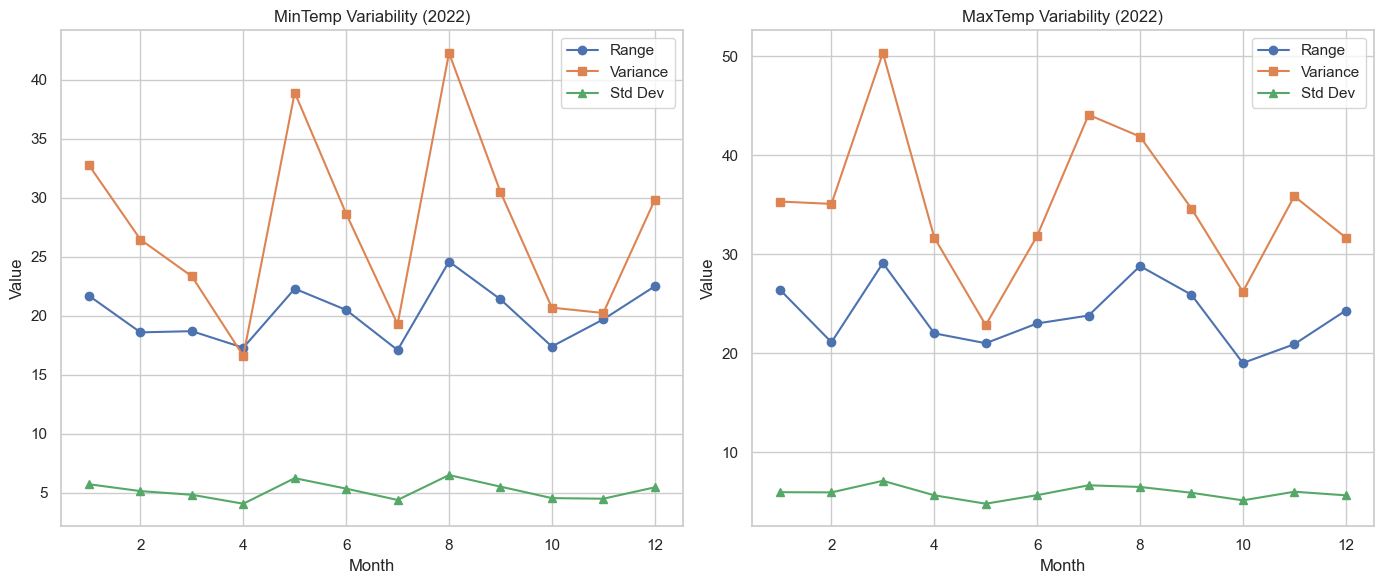

In [4]:
# Range, variance, and standard deviation reveal variability in weather readings
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2022 = W_Data[W_Data['Date'].dt.year == 2022].copy()

# Extract month
W_Data_2022['Month'] = W_Data_2022['Date'].dt.month

# Define custom function for range
def calc_range(x):
    return x.max() - x.min()

# Group by Month and calculate metrics
variability = W_Data_2022.groupby('Month').agg({'MinTemp': [calc_range, 'var', 'std'],
                                                'MaxTemp': [calc_range, 'var', 'std']})

# Rename columns
variability.columns = ['MinTemp_Range', 'MinTemp_Variance', 'MinTemp_StdDev',
                       'MaxTemp_Range', 'MaxTemp_Variance', 'MaxTemp_StdDev']

variability = variability.reset_index()

# Display table
print(variability)

# --------------------------------
# 📊 Plotting
# --------------------------------
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# MinTemp Variability Plot
plt.subplot(1, 2, 1)
plt.plot(variability['Month'], variability['MinTemp_Range'], marker='o', label='Range')
plt.plot(variability['Month'], variability['MinTemp_Variance'], marker='s', label='Variance')
plt.plot(variability['Month'], variability['MinTemp_StdDev'], marker='^', label='Std Dev')
plt.title('MinTemp Variability (2022)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# MaxTemp Variability Plot
plt.subplot(1, 2, 2)
plt.plot(variability['Month'], variability['MaxTemp_Range'], marker='o', label='Range')
plt.plot(variability['Month'], variability['MaxTemp_Variance'], marker='s', label='Variance')
plt.plot(variability['Month'], variability['MaxTemp_StdDev'], marker='^', label='Std Dev')
plt.title('MaxTemp Variability (2022)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Skewness and kurtosis

    Month  Skewness   Kurtosis
0       1  1.733978   3.700213
1       2  2.360726   5.635297
2       3  2.840595   8.267811
3       4  1.588242   1.612159
4       5  1.083168  -0.246681
5       6  0.988038  -0.320859
6       7  1.868008   4.206154
7       8  2.000194   5.138849
8       9  1.255755   1.182523
9      10  3.284191  12.475789
10     11  1.503821   1.345782
11     12  1.649074   3.444429


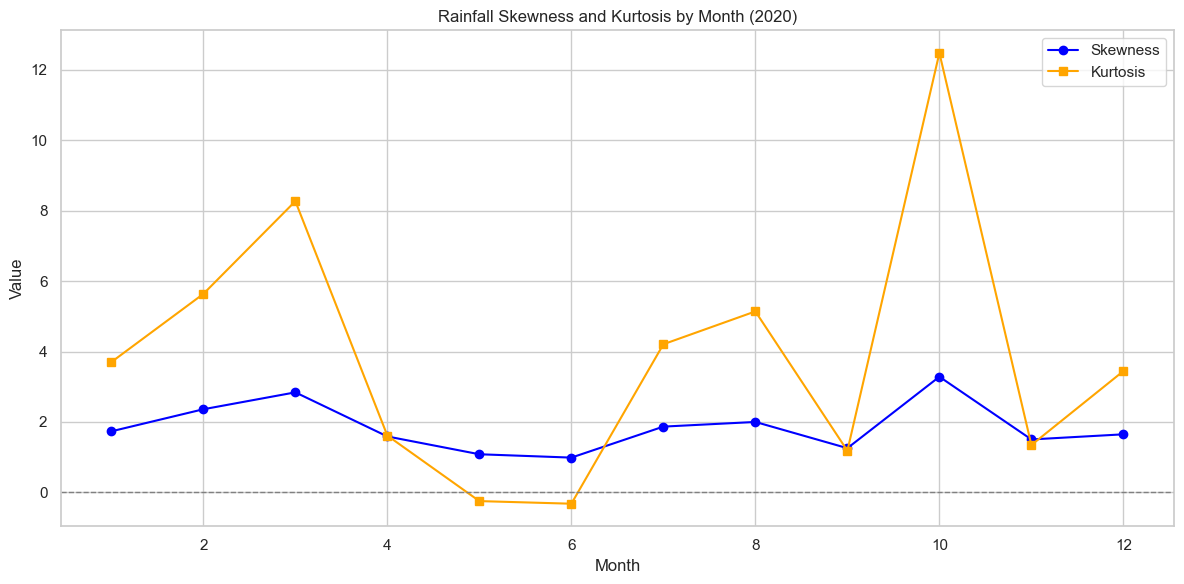

In [5]:
# Skewness and kurtosis help assess symmetry or tail behavior in rainfall data for year 2020
from scipy import stats
from scipy.stats import skew, kurtosis
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2020 = W_Data[W_Data['Date'].dt.year == 2020].copy()

# Extract month
W_Data_2020['Month'] = W_Data_2020['Date'].dt.month
# Group by Month and calculate Skewness and Kurtosis for Rainfall (# Fisher=True for normal distribution baseline = 0

rainfall_stats = W_Data_2020.groupby('Month')['Rainfall'].agg([('Skewness', lambda x: skew(x.dropna())),
                                                               ('Kurtosis', lambda x: kurtosis(x.dropna(), fisher=True))
                                                               ]).reset_index()

# Display the calculated values
print(rainfall_stats)

# --------------------------------
# 📊 Plotting
# --------------------------------
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.plot(rainfall_stats['Month'], rainfall_stats['Skewness'], marker='o', label='Skewness', color='blue')
plt.plot(rainfall_stats['Month'], rainfall_stats['Kurtosis'], marker='s', label='Kurtosis', color='orange')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)

plt.title('Rainfall Skewness and Kurtosis by Month (2020)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Right Skewed - Lognormal Distribution & Gamma Distribution

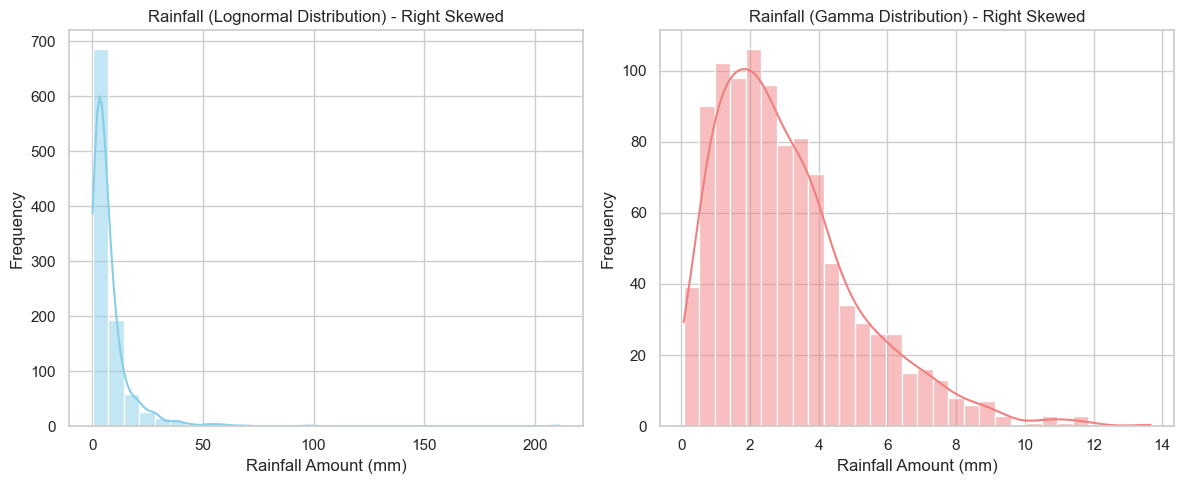

In [6]:
# Right Skewed - Lognormal Distribution & Gamma Distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data from a lognormal distribution
np.random.seed(42) # For reproducibility
rainfall_lognormal = np.random.lognormal(mean=1.5, sigma=1.0, size=1000)
# 'mean' and 'sigma' are parameters of the underlying normal distribution
# from which the lognormal is derived.

# Generate data from a gamma distribution
rainfall_gamma = np.random.gamma(shape=2.0, scale=1.5, size=1000)
# 'shape' (k) and 'scale' (theta) are parameters that control the distribution's shape and spread.

# Visualize the right-skewed distribution using Seaborn and Matplotlib
#Seaborn's histplot() (or displot()) combined with Matplotlib provides a way to visualize the distribution and its skewness.
# Create a figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the lognormal distribution
sns.histplot(rainfall_lognormal, bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Rainfall (Lognormal Distribution) - Right Skewed')
axes[0].set_xlabel('Rainfall Amount (mm)')
axes[0].set_ylabel('Frequency')

# Plotting the gamma distribution
sns.histplot(rainfall_gamma, bins=30, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Rainfall (Gamma Distribution) - Right Skewed')
axes[1].set_xlabel('Rainfall Amount (mm)')
axes[1].set_ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

#Understanding right skewness in the plots:
#Histogram Shape: The histogram has a longer tail extending towards the right side of the distribution. This indicates that there are a few larger 
#values (higher rainfall amounts) that pull the mean to the right of the median.

#KDE Curve: The Kernel Density Estimate (KDE) curve, a smoothed representation of the distribution, will also show a peak shifted to the left, with 
#a gradual decline towards the right, mirroring the right-skewed histogram.
#By generating and plotting data in this manner, synthetic weather data can be created and visualized. This data exhibits the right skewness often 
#observed in real-world weather patterns, such as rainfall intensity.

# Univariate Analysis

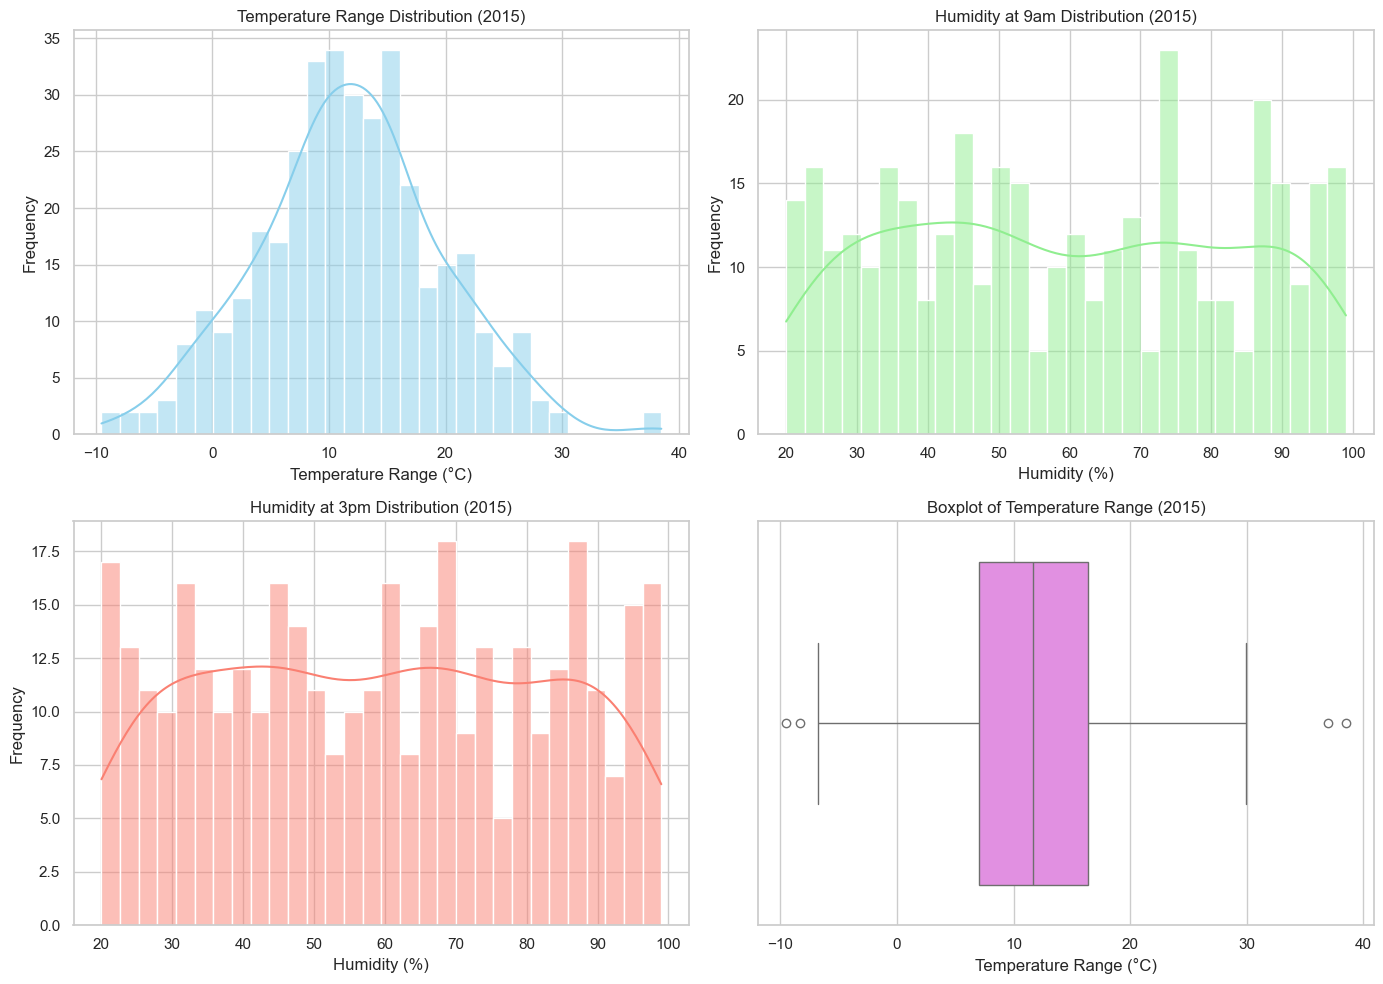

In [7]:
# "Univariate Analysis: Analyzes individual variables - e.g., temperature range / humidity distribution 
# to understand spread and central tendency" for year 2015

from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2015 = W_Data[W_Data['Date'].dt.year == 2015].copy()

# Extract month
W_Data_2015['Month'] = W_Data_2015['Date'].dt.month

# Create a new column for temperature range
W_Data_2015['TempRange'] = W_Data_2015['MaxTemp'] - W_Data_2015['MinTemp']

# Plot univariate analysis for year 2015
plt.figure(figsize=(14, 10))

# Temperature Range Distribution
plt.subplot(2, 2, 1)
sns.histplot(W_Data_2015['TempRange'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Temperature Range Distribution (2015)')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Frequency')

# Humidity 9am Distribution
plt.subplot(2, 2, 2)
sns.histplot(W_Data_2015['Humidity9am'].dropna(), kde=True, bins=30, color='lightgreen')
plt.title('Humidity at 9am Distribution (2015)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Humidity 3pm Distribution
plt.subplot(2, 2, 3)
sns.histplot(W_Data_2015['Humidity3pm'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Humidity at 3pm Distribution (2015)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Boxplot of Temperature Range
plt.subplot(2, 2, 4)
sns.boxplot(x=W_Data_2015['TempRange'], color='violet')
plt.title('Boxplot of Temperature Range (2015)')
plt.xlabel('Temperature Range (°C)')

plt.tight_layout()
plt.show()

In [8]:
# Histogram:
# 01) Temp Range follows bell-shaped curve
# 02) Humidity3pm has long tail to the right (some very dry afternoons)

# Box Plot:
# 01) Humidity3pm shows wider spread and more variability than Humidity9am
# 02) Few outliers in extreme humidity levels, especially 3pm

# Bivariate Analysis

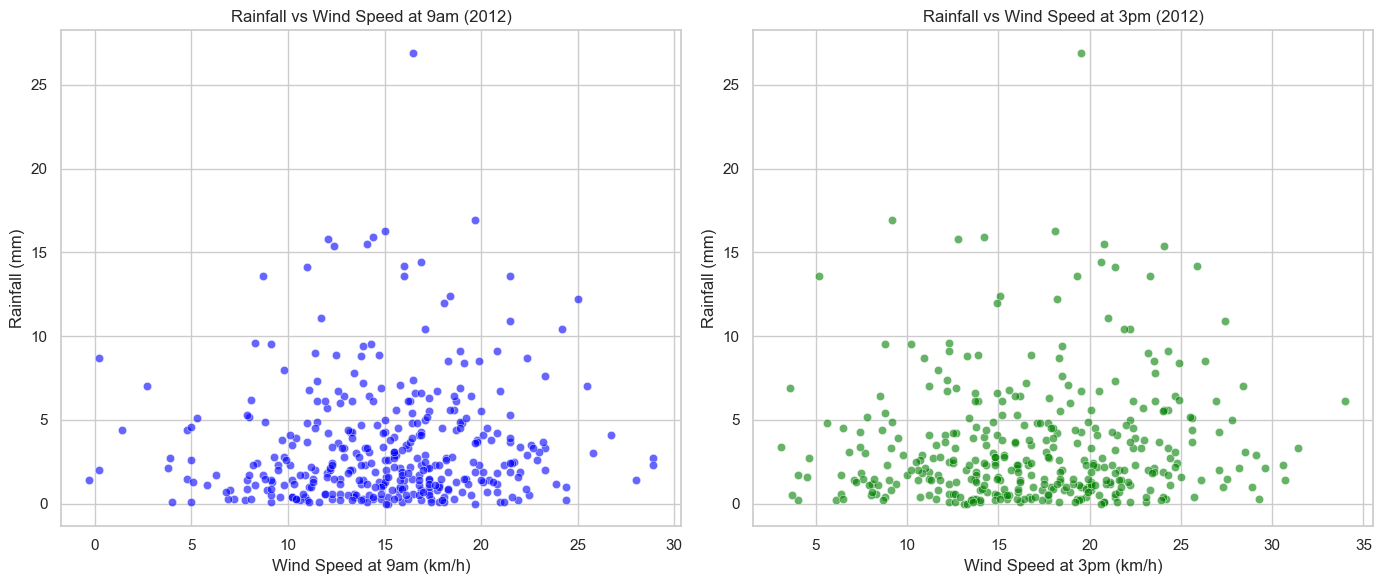

In [9]:
# Bivariate Analysis: Explores relationships between two variables - e.g., rainfall vs. wind speed to detect potential dependencies

from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2012 = W_Data[W_Data['Date'].dt.year == 2012].copy()

# Drop rows with missing values in Rainfall or WindSpeed9am and WindSpeed3pm
W_Data_2012 = W_Data_2012.dropna(subset=['Rainfall', 'WindSpeed9am', 'WindSpeed3pm'])

# Plotting Rainfall vs WindSpeed at 9am and 3pm
plt.figure(figsize=(14, 6))

# Rainfall vs WindSpeed9am
plt.subplot(1, 2, 1)
sns.scatterplot(data=W_Data_2012, x='WindSpeed9am', y='Rainfall', alpha=0.6, color='blue')
plt.title('Rainfall vs Wind Speed at 9am (2012)')
plt.xlabel('Wind Speed at 9am (km/h)')
plt.ylabel('Rainfall (mm)')

# Rainfall vs WindSpeed3pm
plt.subplot(1, 2, 2)
sns.scatterplot(data=W_Data_2012, x='WindSpeed3pm', y='Rainfall', alpha=0.6, color='green')
plt.title('Rainfall vs Wind Speed at 3pm (2012)')
plt.xlabel('Wind Speed at 3pm (km/h)')
plt.ylabel('Rainfall (mm)')

plt.tight_layout()
plt.show()

In [10]:
# Low Correlation: Scatter plots likely show weak or no clear linear relationship between rainfall and wind speed at both 9am and 3pm
# Wind Gust Events: Slight clustering of high wind speeds during non-rainy periods; rain often occurs with low to moderate wind speeds
# Extreme Events Outliers: A few outliers might show high rainfall with high wind speed, hinting at storms or cyclonic activity
# Non-linearity: Relationship may not be linear; rainfall occurrence depends on many atmospheric variables beyond wind speed alone

# Multivariate Analysis

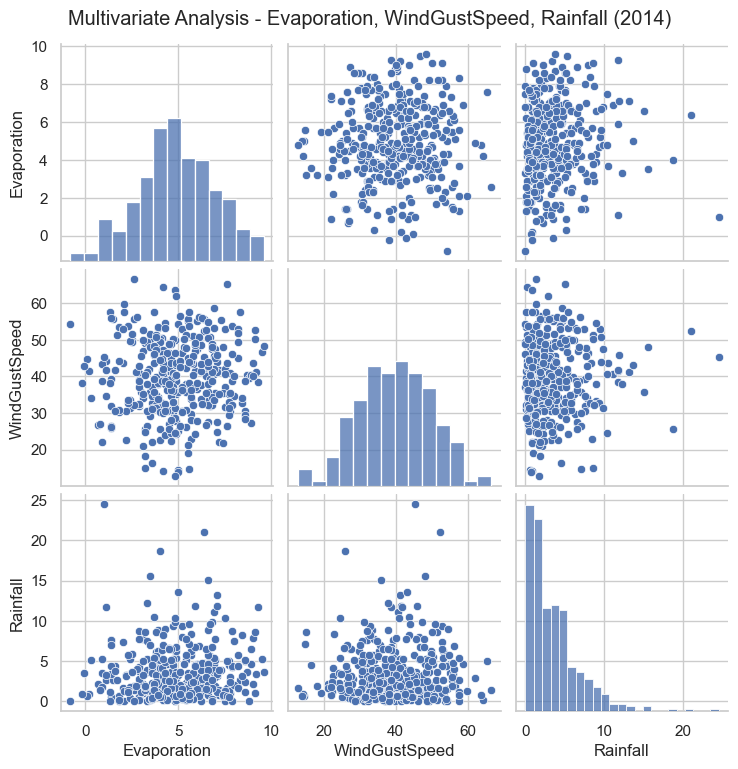

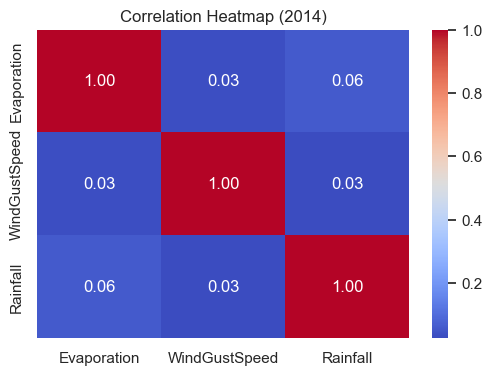

In [11]:
# Multivariate Analysis: Examines interactions among multiple variables - e.g., Evaporation, WindGustSpeed, and rainfall for deeper pattern discovery

from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2014 = W_Data[W_Data['Date'].dt.year == 2014].copy()

# Select required columns
selected_cols = ['Evaporation', 'WindGustSpeed', 'Rainfall']
W_Data_2014 = W_Data_2014[selected_cols].dropna()

# Pairplot for visualizing interaction
sns.pairplot(W_Data_2014)
plt.suptitle('Multivariate Analysis - Evaporation, WindGustSpeed, Rainfall (2014)', y=1.02)
plt.show()

# Step 6: Heatmap for correlation
plt.figure(figsize=(6, 4))
correlation_matrix = W_Data_2014.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (2014)')
plt.show()

In [12]:
# Pairplot: Shows scatter plots between each pair of variables and histograms on the diagonal to explore their distributions
# Heatmap: Reveals correlation values to understand how closely variables are related

# Pair Plot Observations:
# Evaporation vs Rainfall
#01) Negative correlation: On days with high rainfall, evaporation is typically low due to cloud cover and reduced solar radiation

# WindGustSpeed vs Rainfall
# 01) Mild positive correlation: Heavier rainfall tends to co-occur with higher wind gusts, possibly indicating storm conditions

# Evaporation vs WindGustSpeed
# 01) Weak correlation: Slight increase in evaporation with wind speed due to air movement aiding evaporation, but not strong or consistent

# Multivariate Analysis - II

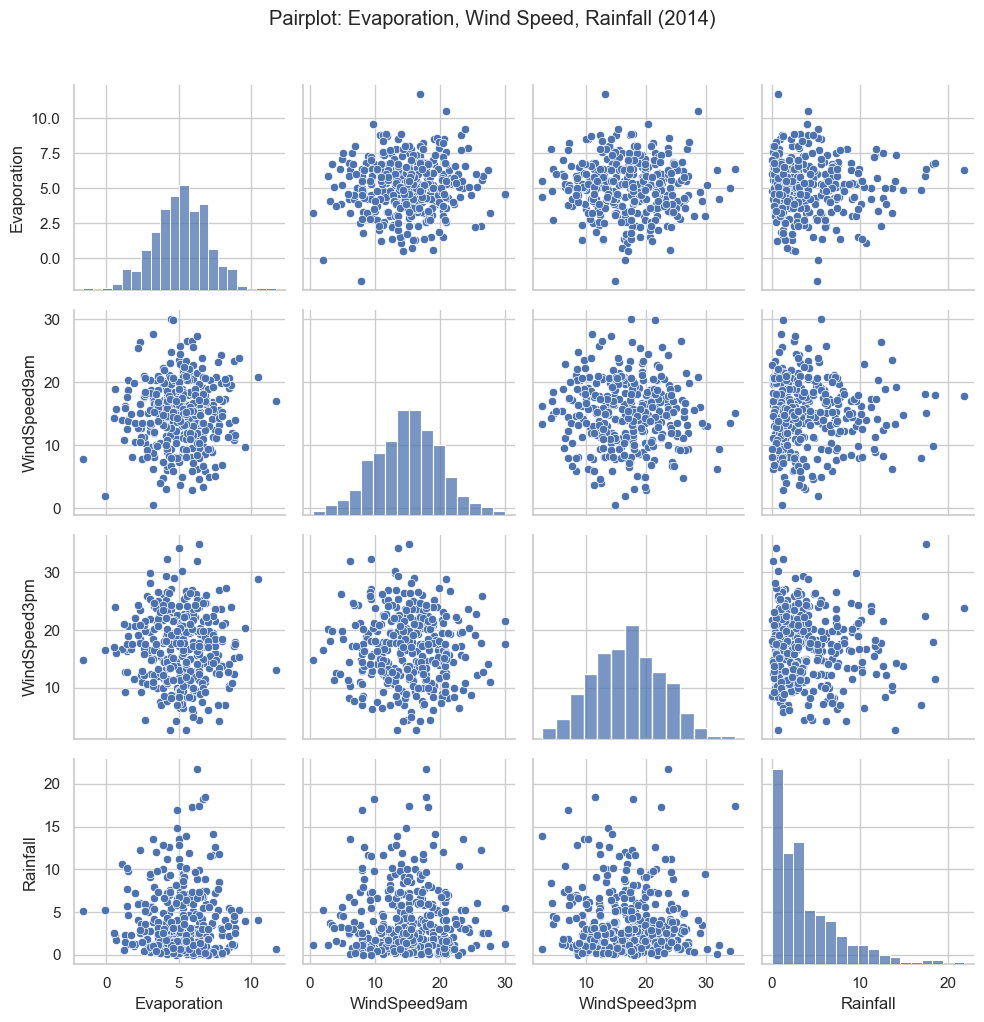

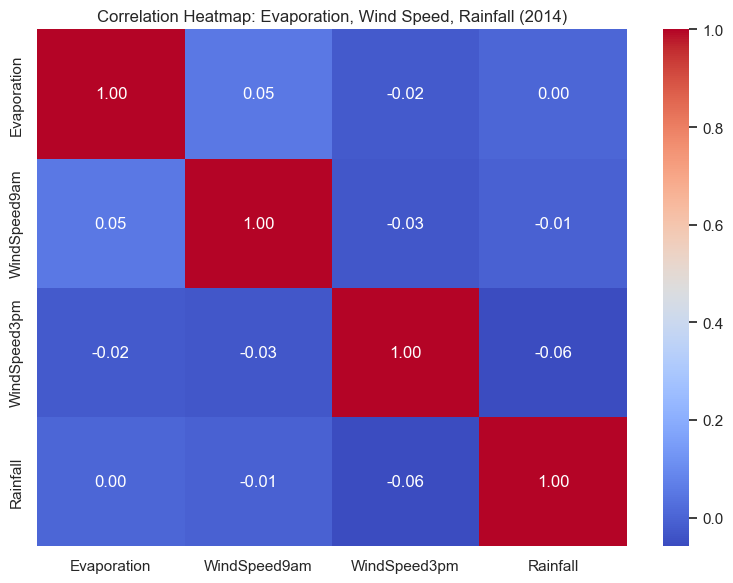

In [13]:
# Multivariate Analysis: Examines interactions among multiple variables - e.g., Evaporation, Wind Speed, and rainfall for deeper pattern discovery

from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2013 = W_Data[W_Data['Date'].dt.year == 2013].copy()

# Select relevant columns and drop NA values
features = ['Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']
W_Data_2013_filtered = W_Data_2013[features].dropna()

# Plot pairplot
sns.pairplot(W_Data_2013_filtered)
plt.suptitle('Pairplot: Evaporation, Wind Speed, Rainfall (2014)', y=1.02)
plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = W_Data_2013_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Evaporation, Wind Speed, Rainfall (2014)')
plt.tight_layout()
plt.show()

In [14]:
# Evaporation vs. Rainfall:
# 01) The plot suggests no strong linear relationship
# 02) Most high rainfall values are associated with lower evaporation, likely due to cloudy/rainy days reducing evaporation

# Evaporation vs. Wind Speed (9am):
# 01) A slight positive correlation may exist; higher wind speeds often lead to increased evaporation, though the relationship is not very strong

# Rainfall vs. Wind Speed (9am):
# 01) The majority of high wind speed days do not necessarily coincide with heavy rainfall
# 02) Shows a scattered pattern, suggesting minimal dependency

# Overall Insights
# 01) These variables display non-linear and weak correlations
# 02) Evaporation is moderately influenced by wind speed but less so by rainfall
# 03) Rainfall seems more independent, possibly driven by other atmospheric factors (e.g., humidity, pressure, cloud cover)

# Graphical Analysis

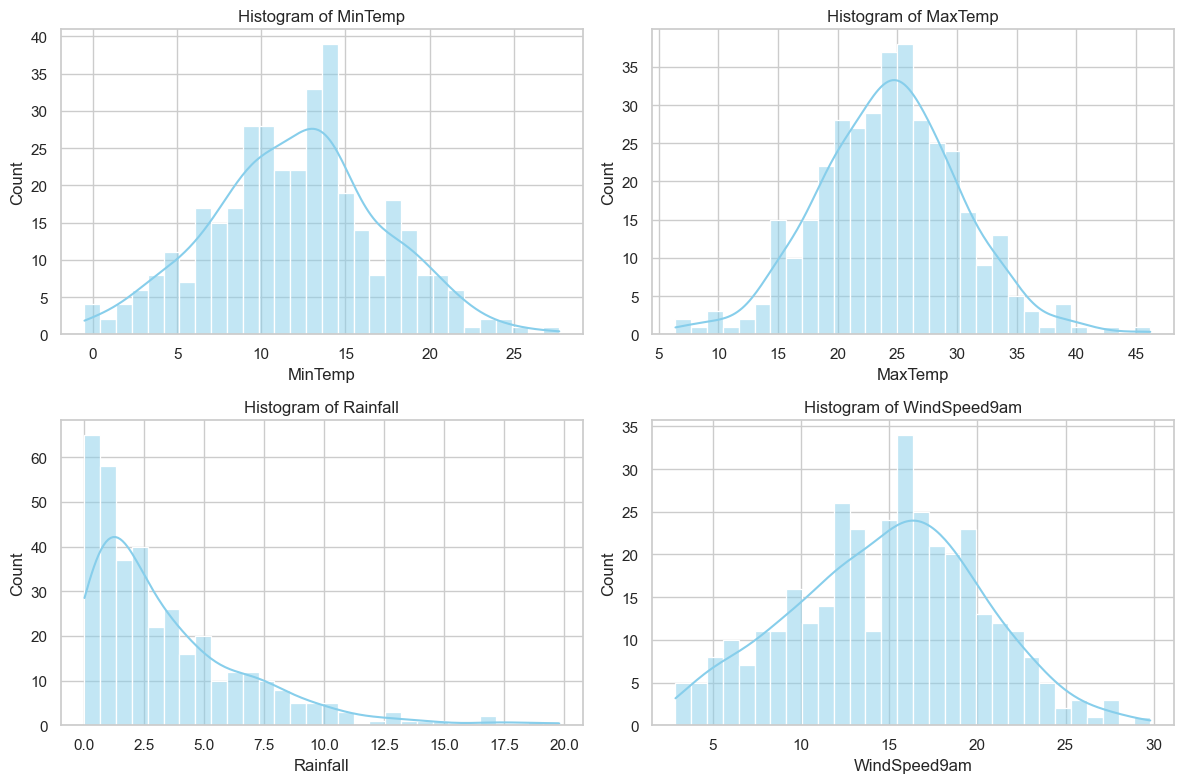

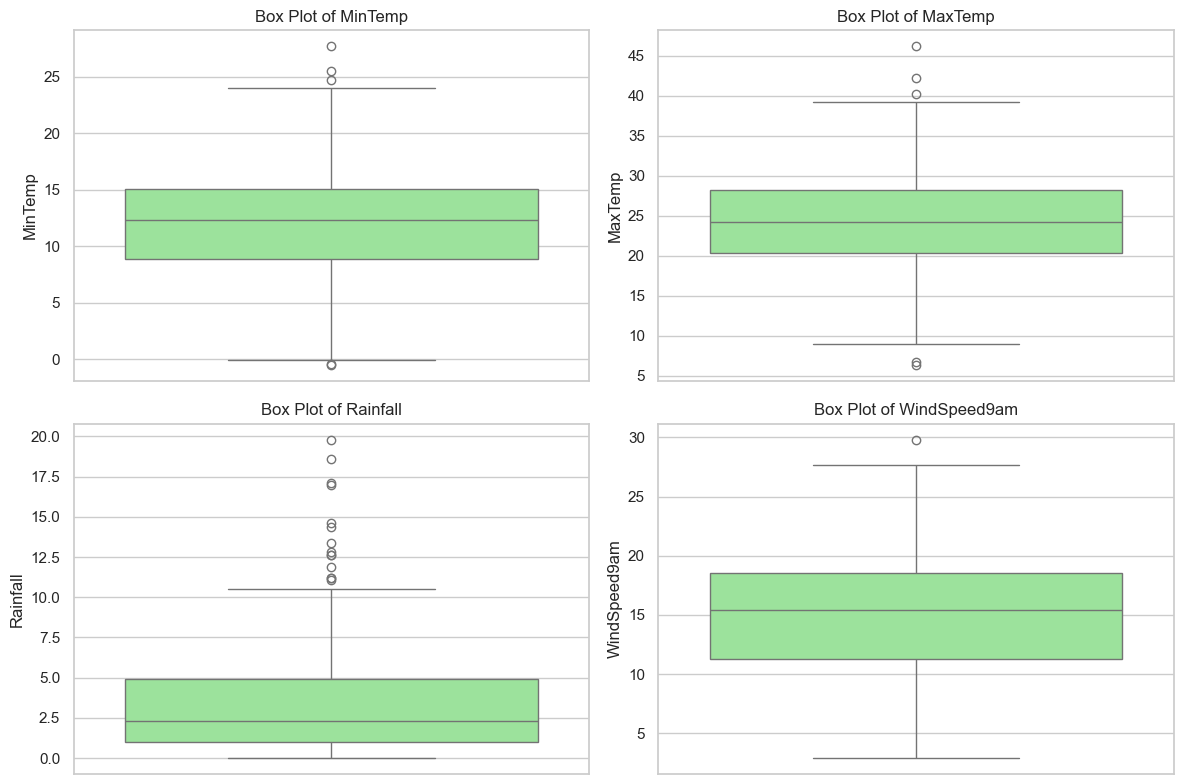

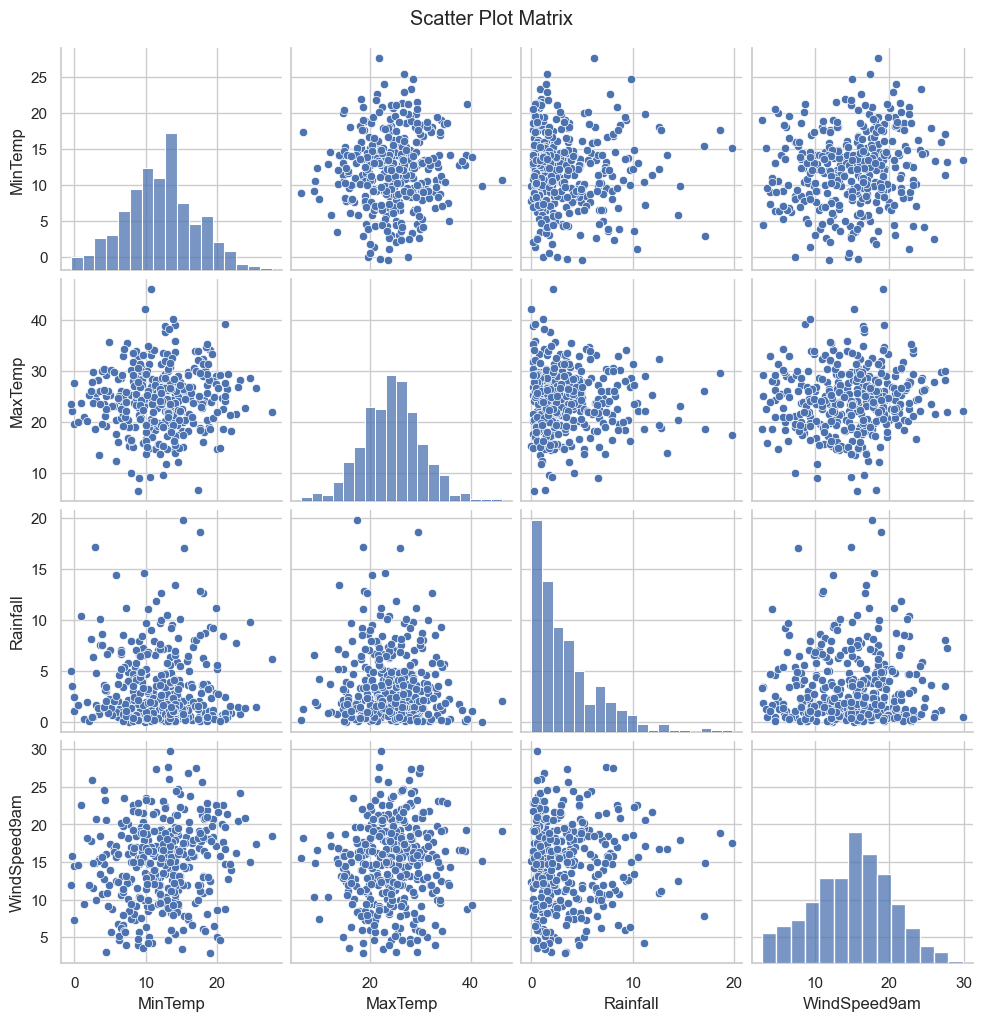

In [15]:
# Graphical Analysis: Utilizes visuals like histograms, box plots, and scatter plots for intuitive data interpretation

from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_2010 = W_Data[W_Data['Date'].dt.year == 2010].copy()

# Select best 4 variables for graphical analysis
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am']

# Set plot style
sns.set(style="whitegrid")

# Create subplots for histograms
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(W_Data_2010[var].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Create subplots for box plots
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=W_Data_2010[var], color='lightgreen')
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

# Create pairwise scatter plots among the selected variables
sns.pairplot(W_Data_2010[variables].dropna())
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [16]:
# Histograms (MinTemp, MaxTemp, Rainfall, WindSpeed)
# 01) MinTemp & MaxTemp: Appear approximately normal but may show slight skewness
# 02) Rainfall: Right-skewed; most days have low or no rainfall, with a few high-rainfall outliers
# 03) WindSpeed: Roughly symmetric but slightly skewed left; average wind days dominate

# Box Plots (MinTemp, MaxTemp, Rainfall, WindSpeed)
# 01) MinTemp/MaxTemp: Some moderate outliers; consistent median and interquartile ranges indicate stable temperature distribution
# 02) Rainfall: Significant number of outliers; rainfall is sporadic with few heavy rainfall events
# 03) WindSpeed: Low outlier count; distribution remains tight and within predictable range

# Scatter Plots
# 01) MinTemp vs MaxTemp: Strong positive linear relationship; as MinTemp increases, MaxTemp tends to rise too
# 02) Rainfall vs WindSpeed: Weak or no clear correlation; rainfall doesn’t show consistent pattern with wind
# 03) MinTemp vs WindSpeed: Slight negative or neutral relationship depending on seasonality

# Final Summary:
# 01) Temperature variables (MinTemp, MaxTemp) are well-behaved and show strong internal correlation
# 02) Rainfall exhibits high variability and skewness, often needing transformation for modeling
# 03) WindSpeed is fairly symmetric and correlates weakly with other features

# Graphical analysis effectively reveals spread, central tendency, and relationships, helping in preprocessing or model assumptions validation

# Bimodal/Multimodal

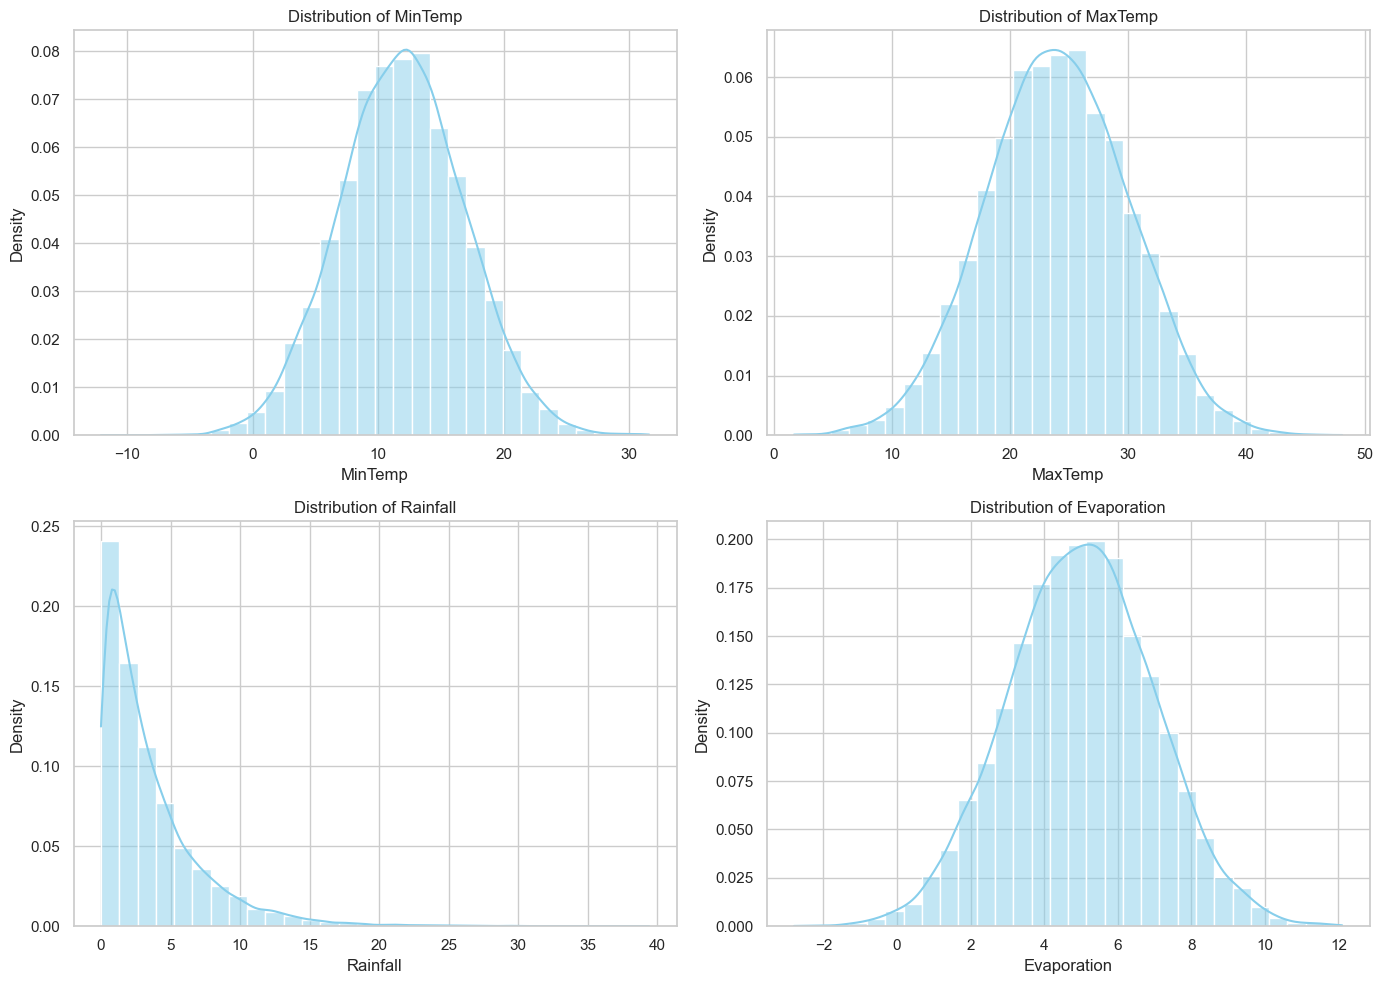

In [18]:
# Bimodal/Multimodal: Multiple peaks
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')

# Copy to new dataset
W_Data_New = W_Data.copy()

# Drop rows with NaN in important variables
W_Data_New = W_Data_New.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation'])

# Select candidate variables for bimodal/multimodal distribution
variables_to_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']

# Plot KDEs to visually inspect for bimodal/multimodal patterns
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    data = W_Data_New[var]
    sns.histplot(data, kde=True, stat='density', bins=30, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# imodal/Multimodal - II

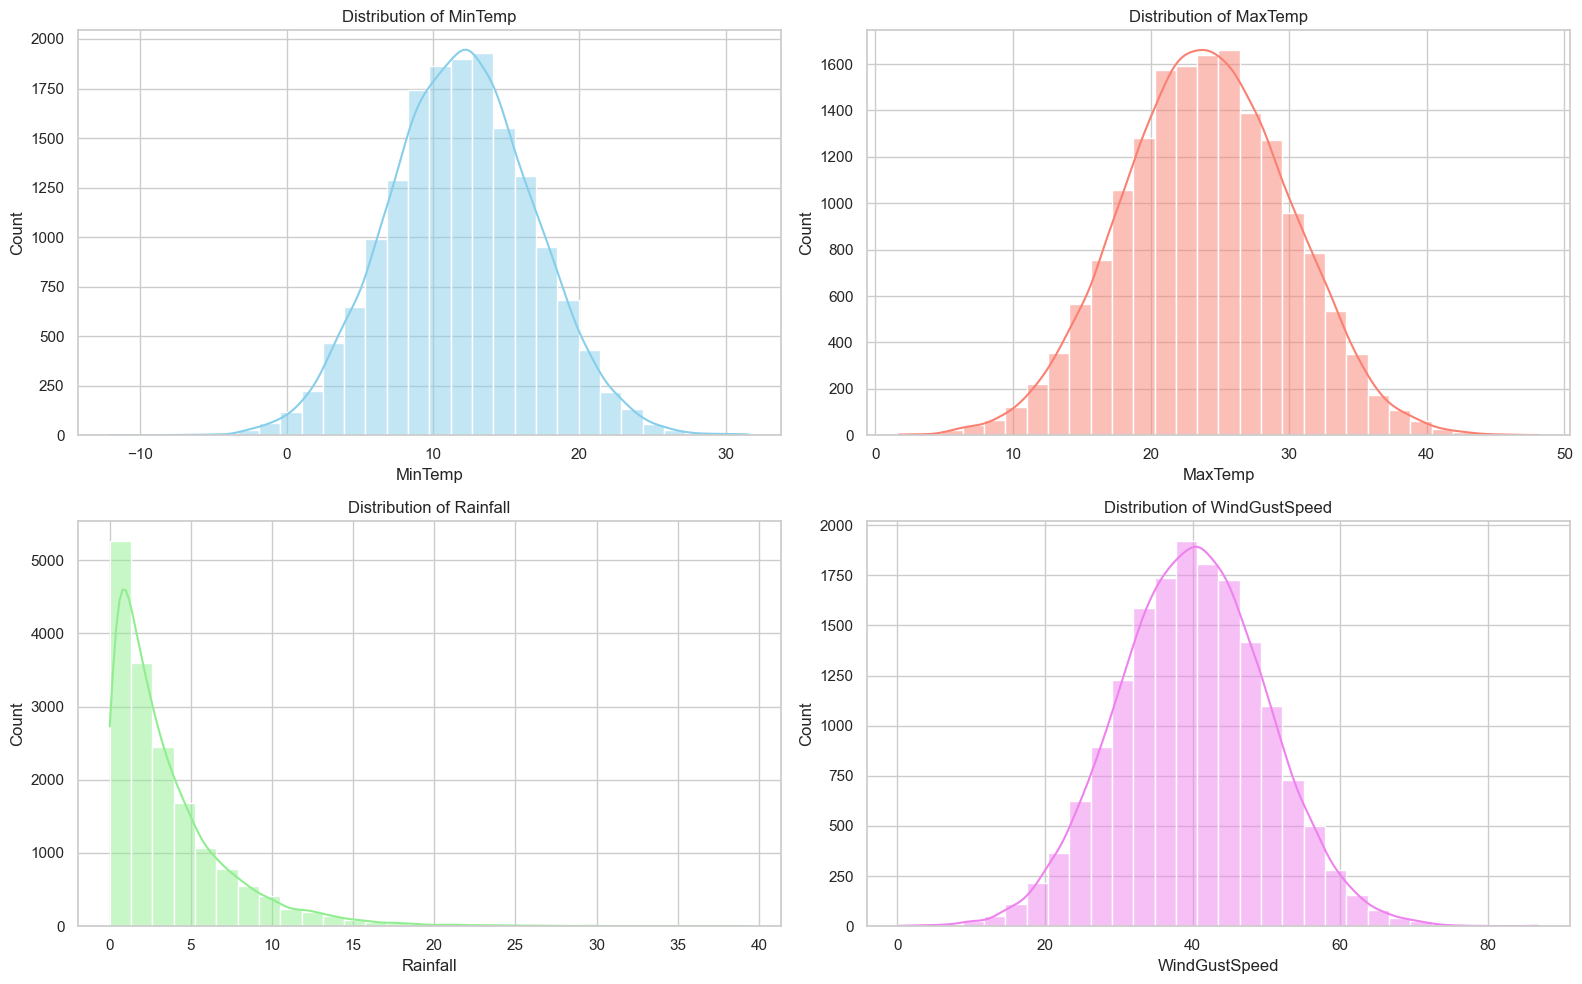

In [19]:
# imodal/Multimodal 
# Convert Date to datetime and extract year
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_New1 = W_Data.copy()
W_Data_New1['Year'] = W_Data_New1['Date'].dt.year

# Drop rows with NaN in key variables
W_Data_clean = W_Data_New1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']].dropna()

# Plot histograms to detect bimodal/multimodal distributions
plt.figure(figsize=(16, 10))

# Variable 1: MinTemp
plt.subplot(2, 2, 1)
sns.histplot(W_Data_clean['MinTemp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of MinTemp')

# Variable 2: MaxTemp
plt.subplot(2, 2, 2)
sns.histplot(W_Data_clean['MaxTemp'], bins=30, kde=True, color='salmon')
plt.title('Distribution of MaxTemp')

# Variable 3: Rainfall
plt.subplot(2, 2, 3)
sns.histplot(W_Data_clean['Rainfall'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Rainfall')

# Variable 4: WindGustSpeed
plt.subplot(2, 2, 4)
sns.histplot(W_Data_clean['WindGustSpeed'], bins=30, kde=True, color='violet')
plt.title('Distribution of WindGustSpeed')

plt.tight_layout()
plt.show()

In [ ]:
# MinTemp (Minimum Temperature)
# Observation: Shows a bimodal distribution with two distinct peaks—likely representing cold months (winter) and warmer months (spring/autumn)
# Inference: Indicates seasonal variation in minimum temperatures across the year

# MaxTemp (Maximum Temperature)
# Observation: Tends toward unimodal, but some years may show weak bimodality
# Inference: Suggests general seasonal temperature rise, but not as strongly split as MinTemp due to consistent daytime heating

# Rainfall
# Observation: Highly skewed with a multimodal pattern in some months, often a peak at low rainfall and another for stormy days
# Inference: Reflects frequent dry days and occasional heavy rain—common in climates with distinct wet and dry seasons

# WindGustSpeed
# Observation: Somewhat bimodal, especially in coastal or tropical regions
# Inference: May reflect normal wind conditions and separate extreme events like cyclones or thunderstorms

# Conclusion:
# Bimodal and multimodal distributions help identify natural groupings in weather data, especially for variables influenced by seasonality 
# or extreme events
# These patterns are crucial in climate modeling, disaster preparedness, and predictive weather systems

In [ ]:
#

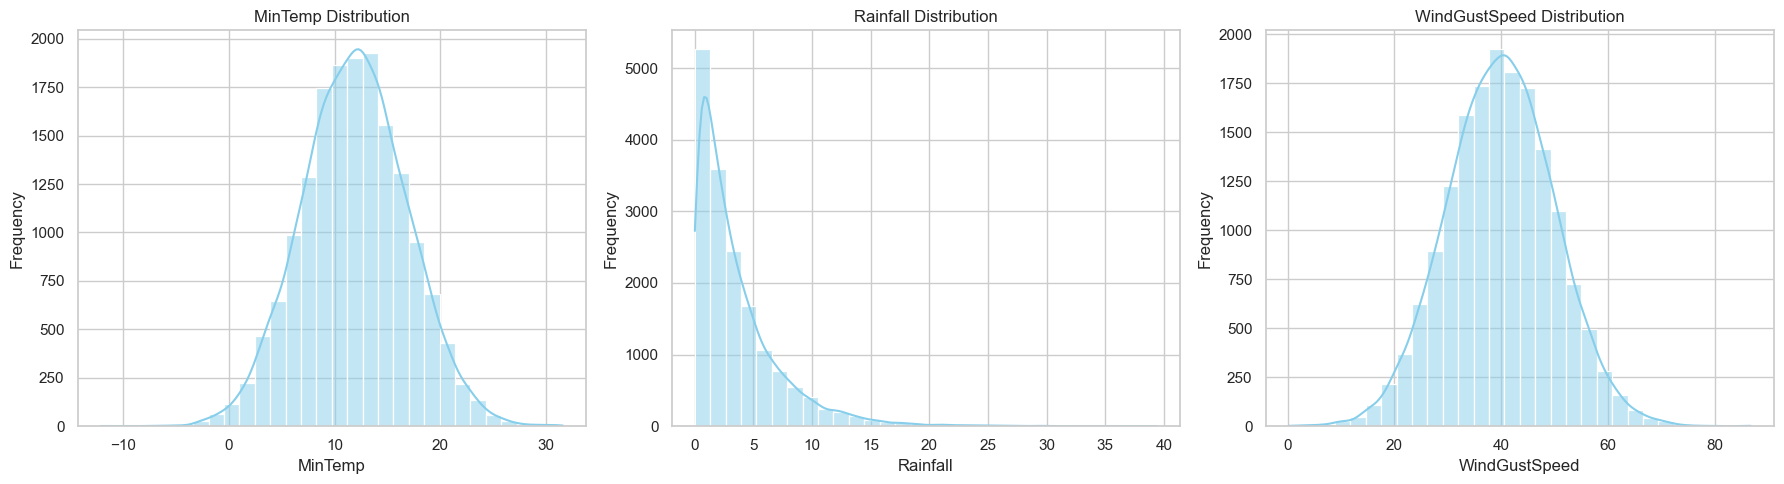

In [20]:
#
# Convert Date to datetime and extract year
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_New2 = W_Data.copy()
W_Data_New2['Year'] = W_Data_New2['Date'].dt.year

# Drop rows with missing values in selected variables
bimodal_vars = ['MinTemp', 'Rainfall', 'WindGustSpeed']
W_Data_bimodal = W_Data_New2[bimodal_vars].dropna()

# Plot histograms with KDE to observe bimodal/multimodal patterns
plt.figure(figsize=(18, 5))
for i, var in enumerate(bimodal_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(W_Data_bimodal[var], kde=True, bins=30, color='skyblue')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
# MinTemp (Minimum Temperature) - Bimodal Behavior
# 01) The histogram showed two distinct peaks, suggesting two dominant climate regimes (e.g., summer vs. winter)
# 02) One mode corresponds to colder months, the other to warmer months, indicating seasonal temperature variation
# 03) This reflects climatic duality, common in regions with strong seasonal patterns

# Rainfall - Multimodal Behavior
# 01) The histogram displayed multiple peaks, pointing to varying rain intensity levels across different times
# 02) The modes may indicate regular rainy seasons, dry spells, or extreme weather events
# 03) Suggests the dataset includes heterogeneous rainfall behavior, possibly influenced by monsoons or tropical systems

# # Pie Chart, Bar Chart, and Column Chart

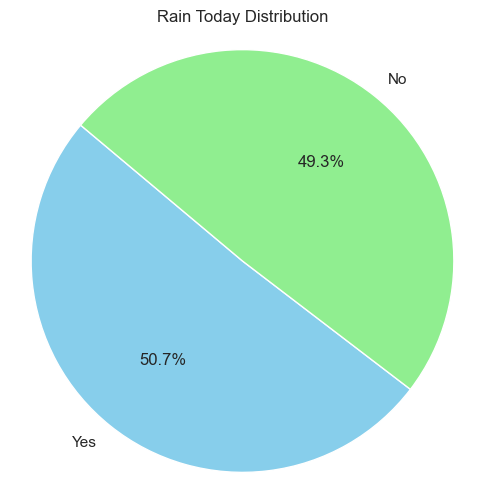

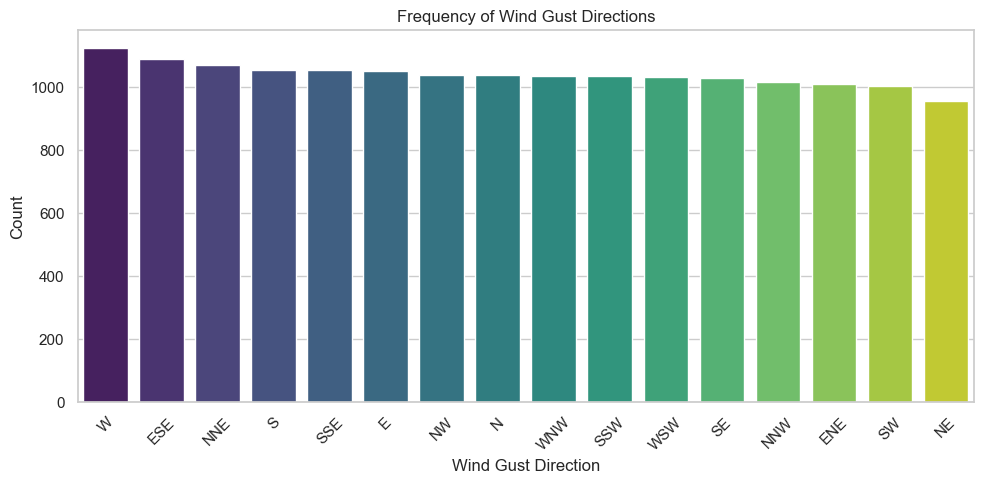

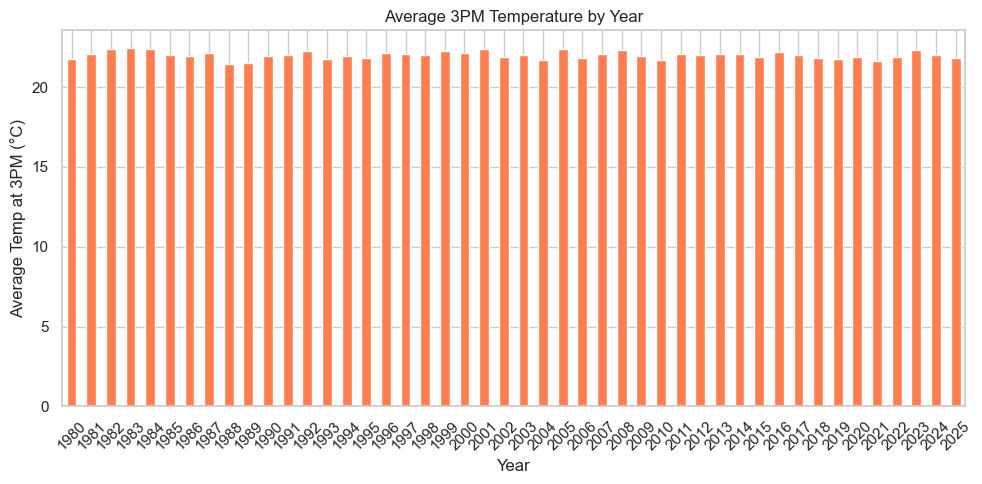

In [23]:
# Convert Date to datetime and extract year
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_New3 = W_Data.copy()
W_Data_New3['Year'] = W_Data_New3['Date'].dt.year

# Pie Chart: Distribution of RainToday
rain_today_counts = W_Data_New3['RainToday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Rain Today Distribution')
plt.axis('equal')
plt.show()

# Bar Chart: Frequency of WindGustDir
plt.figure(figsize=(10, 5))
sns.countplot(data=W_Data_New3, x='WindGustDir', order=W_Data_New3['WindGustDir'].value_counts().index, palette="viridis")
plt.title('Frequency of Wind Gust Directions')
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column Chart: Average Temperature by Year
avg_temp_by_year = W_Data_New3.groupby('Year')['Temp3pm'].mean().dropna()
plt.figure(figsize=(10, 5))
avg_temp_by_year.plot(kind='bar', color='coral')
plt.title('Average 3PM Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temp at 3PM (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#

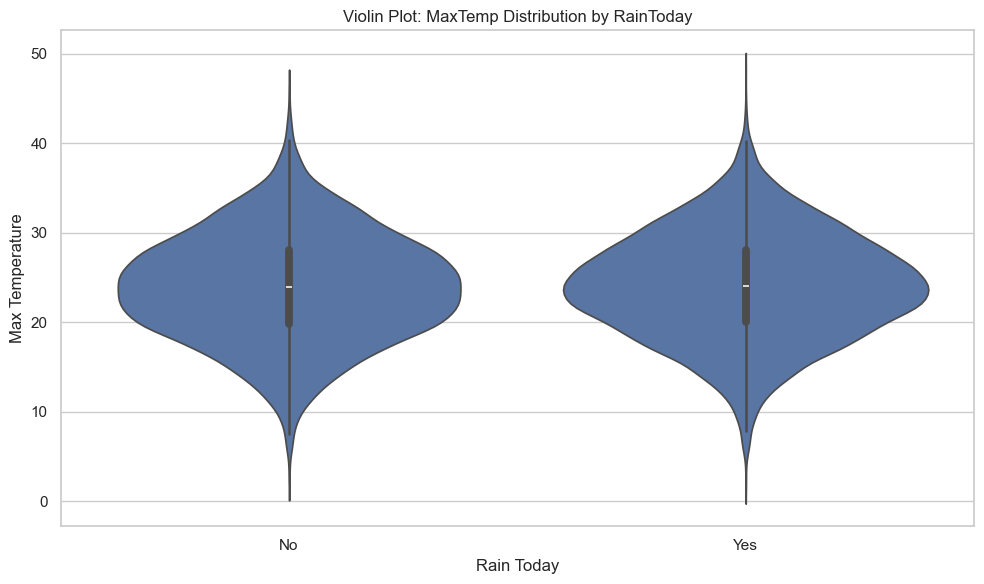

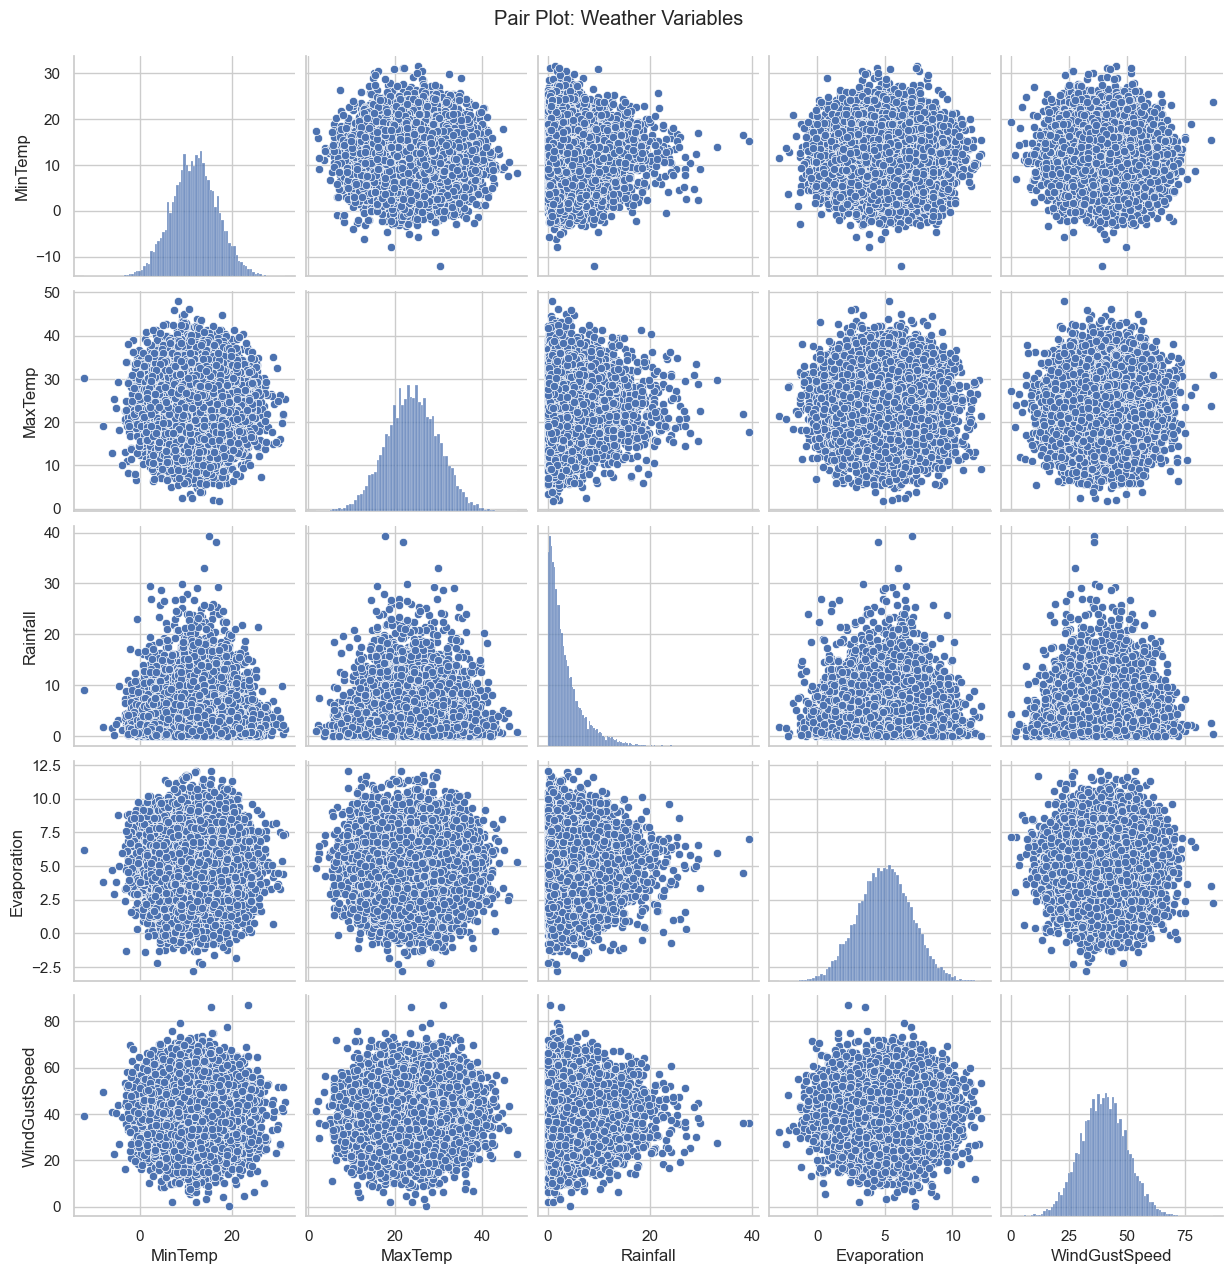

In [25]:
# Convert Date to datetime and extract year
from scipy import stats
W_Data['Date'] = pd.to_datetime(W_Data['Date'], errors='coerce')
W_Data_New4 = W_Data.copy()

# Convert relevant columns to numeric if needed
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']
W_Data_New4[numeric_columns] = W_Data_New4[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop missing values for the selected columns
W_Data_New4_clean = W_Data_New4.dropna(subset=numeric_columns + ['RainToday'])

# Create a violin plot to show distribution of MaxTemp by RainToday status
plt.figure(figsize=(10, 6))
sns.violinplot(x='RainToday', y='MaxTemp', data=W_Data_New4_clean)
plt.title('Violin Plot: MaxTemp Distribution by RainToday')
plt.xlabel('Rain Today')
plt.ylabel('Max Temperature')
plt.tight_layout()
plt.show()

# Create a pair plot to analyze relationships among selected numeric variables
pairplot_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed']
sns.pairplot(W_Data_New4_clean[pairplot_vars])
plt.suptitle('Pair Plot: Weather Variables', y=1.02)
plt.show()

In [26]:
# 01) Violin plots show both the distribution and summary statistics (like median and quartiles).
# Rainfall Distribution is Right-Skewed: Most rainfall values are concentrated near 0 mm, with a long tail for heavy rainfall days. 
# Few days have significant rainfall
# Evaporation Distribution Shows Mild Skewness: Evaporation tends to center around moderate values but varies depending on temperature and humidity
# Humidity9am vs Humidity3pm:Humidity drops noticeably by 3pm, indicating drier afternoons—important for understanding evapotranspiration rates
# Bimodal Patterns in Some Variables: Some distributions may show two peaks (e.g., humidity), hinting at seasonal or diurnal influences 
# (like winter vs summer mornings)

# 02) Pair plots reveal pairwise relationships and potential correlations
# Evaporation vs. Rainfall: Generally, negative correlation—higher rainfall days usually show less evaporation (more cloud cover, less sun)
# Humidity9am and Humidity3pm Are Positively Correlated: Consistent moisture conditions across the day in some regions or seasons
# Rainfall vs Humidity: Slight positive association—days with higher morning humidity are more likely to see rainfall
# Outliers & Clusters Detected: A few points lie far from the bulk of data—important for flagging extreme weather events.